In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("data_sk.csv", sep = ",")

/var/folders/_v/69trf4797bjdm6rrmtk051240000gn/T/ipykernel_59214/86314798.py:1: DtypeWarning: Columns (5,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data_sk.csv", sep = ",")


In [3]:
data.head(5)

,datum,den_v_tyzdni,cas,stat,cislo_dialnice,kilometer,mesto,pricina_nehody,druh_nehody,klasifikacia_nehody,...,pocet_tazko_zranenych,pocet_nezranenych,pocet_neuvedenych,celkovy_pocet_zranenych,pocet_vozidiel,latitude,longitude,regional,delegacia,uop
0,10/11/2009,Utorok,14:10:00,MG,381.0,495.0,BETIM,Neprisposobena rychlost,Zrazka zo zadu,Nehoda so zraneniami,...,0,1,0,4,2,NaN,NaN,NaN,NaN,NaN
1,16/10/2009,Piatok,04:35:00,MG,251.0,419.6,GRAO MOGOL,Ine,Celna zrazka,Smrtelna nehoda,...,5,0,0,5,2,NaN,NaN,NaN,NaN,NaN
2,20/09/2009,Nedela,20:00:00,PI,316.0,24.0,TERESINA,Spanok,Opustenie jazdneho pruhu,Nehoda so zraneniami,...,4,0,0,6,1,NaN,NaN,NaN,NaN,NaN
3,17/05/2009,Nedela,15:45:00,RJ,101.0,429.0,MANGARATIBA,Nedostatocna pozornost,Priecna zrazka,Nehoda bez obeti,...,0,2,0,0,2,NaN,NaN,NaN,NaN,NaN
4,05/07/2009,Nedela,17:30:00,PE,101.0,59.2,RECIFE,Ine,Pad z motocykla/bicykla/vozidla,Nehoda so zraneniami,...,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN


PRETYPOVANIE ATRIBÚTOV + DOPLNENIE CHÝBAJÚCICH HODNÔT

In [4]:
data.dtypes

datum                       object
den_v_tyzdni                object
cas                         object
stat                        object
cislo_dialnice             float64
kilometer                   object
mesto                       object
pricina_nehody              object
druh_nehody                 object
klasifikacia_nehody         object
faza_dna                    object
sklon_vozovky               object
pocasie                     object
typ_dialnice                object
miesto_nehody               object
lokacia_dialnice            object
rok                        float64
pocet_osob                   int64
pocet_mrtvych                int64
pocet_lahko_zranenych        int64
pocet_tazko_zranenych        int64
pocet_nezranenych            int64
pocet_neuvedenych            int64
celkovy_pocet_zranenych      int64
pocet_vozidiel               int64
latitude                    object
longitude                   object
regional                    object
delegacia           

In [5]:
#Pretypovanie atributov datum a cas na format datetime
data['datum'] = pd.to_datetime(data['datum'], format='mixed')
data['cas'] = pd.to_datetime(data['cas'])

/var/folders/_v/69trf4797bjdm6rrmtk051240000gn/T/ipykernel_59214/4066520581.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['cas'] = pd.to_datetime(data['cas'])


In [6]:
#Rozdelenie atributu datum do 3 atributov (den, mesiac, rok)
data['rok'] = data['datum'].apply(lambda time: time.year)
data['mesiac'] = data['datum'].apply(lambda time: time.month)
data['den'] = data['datum'].apply(lambda time: time.day)
data = data.drop(['datum'], axis = 1)

#Uprava atributu cas na cele hodiny
data['cas'] = data['cas'].apply(lambda time: time.hour)

In [7]:
#Vymazanie atributov s vysokym poctom chybajucich hodnot
data = data.drop(['latitude', 'longitude', 'regional', 'delegacia', 'uop'], axis=1)

In [8]:
#Zmena poradia atributov
data = data[['den', 'mesiac', 'rok', 'den_v_tyzdni', 'cas', 'stat', 'cislo_dialnice', 'kilometer', 'mesto', 'pricina_nehody', 'druh_nehody', 'faza_dna', 'pocasie', 'sklon_vozovky', 'typ_dialnice', 'miesto_nehody', 'lokacia_dialnice', 'pocet_vozidiel', 'pocet_osob', 'celkovy_pocet_zranenych', 'pocet_mrtvych', 'pocet_lahko_zranenych', 'pocet_tazko_zranenych', 'pocet_nezranenych', 'pocet_neuvedenych', 'klasifikacia_nehody']]

In [9]:
#Pocet chybajucich hodnot pre kazdy atribut
data.isna().sum()

den                          0
mesiac                       0
rok                          0
den_v_tyzdni                 0
cas                          0
stat                        12
cislo_dialnice             894
kilometer                  894
mesto                        0
pricina_nehody               2
druh_nehody                 40
faza_dna                    70
pocasie                     61
sklon_vozovky                0
typ_dialnice                10
miesto_nehody               10
lokacia_dialnice            10
pocet_vozidiel               0
pocet_osob                   0
celkovy_pocet_zranenych      0
pocet_mrtvych                0
pocet_lahko_zranenych        0
pocet_tazko_zranenych        0
pocet_nezranenych            0
pocet_neuvedenych            0
klasifikacia_nehody         26
dtype: int64

In [10]:
#Odstranenie zaznamov s prazdnymi hodnotami
data = data.dropna(subset=['kilometer', 'druh_nehody', 'faza_dna', 'pricina_nehody', 'pocasie', 'typ_dialnice', 'miesto_nehody', 'lokacia_dialnice'])

In [11]:
#Pretypovanie atributu cislo_dialnice na object
data['cislo_dialnice'] = data['cislo_dialnice'].astype(int).astype(str)

In [12]:
#Nahradenie desatinnej ciarky bodkou pre konzistentnost atributu kilometer
def convert_to_float_or_str(value):
    try:
        if isinstance(value, str):
            return float(value.replace(',', '.'))
        else:
            return value
    except ValueError:
        return None

data['kilometer'] = data['kilometer'].apply(convert_to_float_or_str)

In [13]:
#Pocet prikladov pre kazdu unikatnu hodnotu atributu klasifikacia_nehody
data['klasifikacia_nehody'].value_counts()

klasifikacia_nehody
Nehoda bez obeti        999168
Nehoda so zraneniami    878436
Smrtelna nehoda          90965
Neuvedene                11660
Name: count, dtype: int64

In [14]:
# Upravenie atributu 'klasifikacia_nehody' na zaklade novych kriterii
def uprav_klasifikaciu(riadok):
    if riadok['pocet_mrtvych'] >= 1:
        return 'Smrtelna nehoda'
    elif riadok['pocet_mrtvych'] == 0 and riadok['pocet_lahko_zranenych'] == 0 and riadok['pocet_tazko_zranenych'] == 0 and riadok['pocet_nezranenych'] >= 1:
        return 'Nehoda bez zraneni'
    elif riadok['pocet_tazko_zranenych'] >= 1:
        return 'Nehoda s tazkymi zraneniami'
    else:
        return 'Nehoda s lahkymi zraneniami'

data['klasifikacia_nehody'] = data.apply(uprav_klasifikaciu, axis=1)

In [15]:
#Vytvorenie cieloveho atributu nebezpecenstvo
def urcenie_nebezpecenstva(riadok):
    if riadok['klasifikacia_nehody'] in ['Smrtelna nehoda', 'Nehoda s tazkymi zraneniami']:
        return 1
    else:
        return 0

data['nebezpecenstvo'] = data.apply(urcenie_nebezpecenstva, axis=1)

In [16]:
#Pocet unikatnych hodnot atributu nebezpecenstvo
data['nebezpecenstvo'].value_counts()

nebezpecenstvo
0    1630314
1     349941
Name: count, dtype: int64

In [17]:
def aktualizuj_nebezpecnost(data):
    #Zoznam dialnic
    unikatne_dialnice = data['cislo_dialnice'].unique()
    
    for dialnica in unikatne_dialnice:
        pocet_nebezpecnych = data[(data['cislo_dialnice'] == dialnica) & (data['nebezpecenstvo'] == 1)].shape[0]
        pocet_bezpecnych = data[(data['cislo_dialnice'] == dialnica) & (data['nebezpecenstvo'] == 0)].shape[0]
        percento_nebezpecnych = (pocet_nebezpecnych / (pocet_nebezpecnych+pocet_bezpecnych))
        
        #Ak doslo k max 15 nehodam, dialnica je bezpecna
        if pocet_nebezpecnych + pocet_bezpecnych <= 15:
            data.loc[data['cislo_dialnice'] == dialnica, 'nebezpecenstvo'] = 0
        #Ak 15% a viac nehod na danej dialnici je nebezpecnych, dialnica je nebezpecna
        elif percento_nebezpecnych >= 0.15:
            data.loc[data['cislo_dialnice'] == dialnica, 'nebezpecenstvo'] = 1
        #Ostatne dialnice su bezpecne
        else:
            data.loc[data['cislo_dialnice'] == dialnica, 'nebezpecenstvo'] = 0
    
    return data

data = aktualizuj_nebezpecnost(data)

In [18]:
#Pocet unikatnych hodnot atributu nebezpecenstvo
data['nebezpecenstvo'].value_counts()

nebezpecenstvo
1    1282965
0     697290
Name: count, dtype: int64

In [19]:
#Pocet bezpecnych a nebezpecnych dialnic
pocet_dialnic_s_0 = data[data['nebezpecenstvo'] == 0]['cislo_dialnice'].nunique()
pocet_dialnic_s_1 = data[data['nebezpecenstvo'] == 1]['cislo_dialnice'].nunique()

print(f"Počet dialníc s hodnotou nebezpečenstva 0: {pocet_dialnic_s_0}")
print(f"Počet dialníc s hodnotou nebezpečenstva 1: {pocet_dialnic_s_1}")

Počet dialníc s hodnotou nebezpečenstva 0: 108
Počet dialníc s hodnotou nebezpečenstva 1: 100


KORELÁCIA MEDZI NUMERICKÝMI ATRIBÚTMI

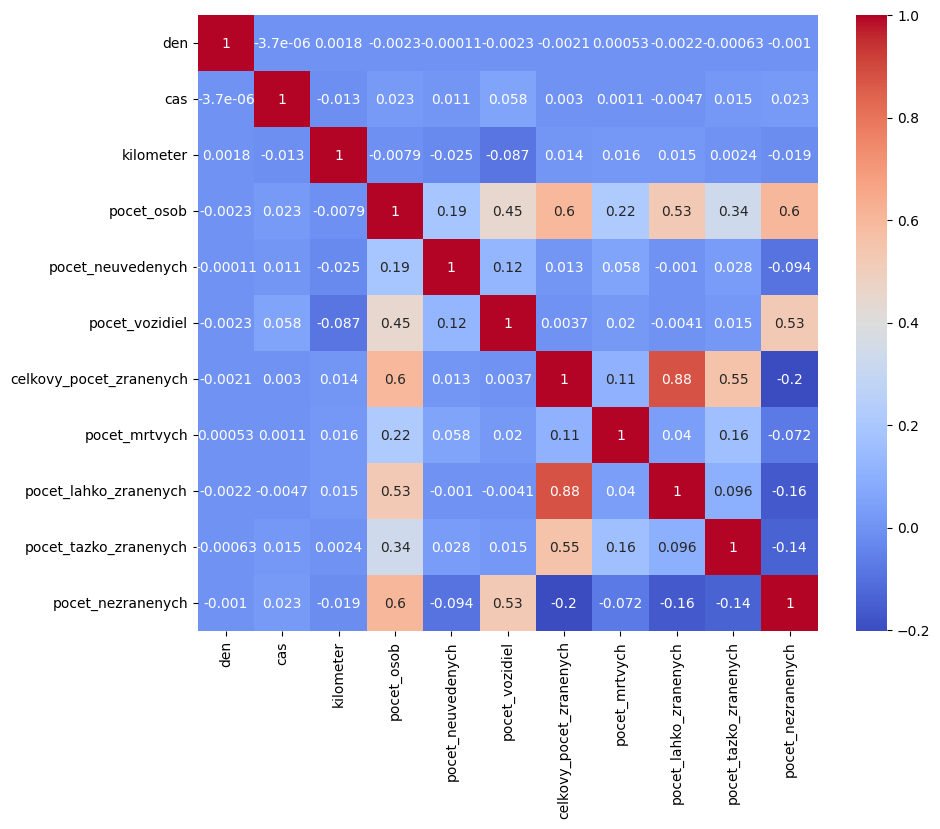

In [20]:
num_data = data[['den', 'cas', 'kilometer', 'pocet_osob', 'pocet_neuvedenych', 'pocet_vozidiel', 'celkovy_pocet_zranenych', 'pocet_mrtvych', 'pocet_lahko_zranenych', 'pocet_tazko_zranenych', 'pocet_nezranenych']]
corr_matrix = num_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [21]:
#odstranie atributov, ktore boli pouzite pri uprave inych atributov, taktiez atributy s vysokou a strednou korelaciou
data = data.drop(['cislo_dialnice','pocet_mrtvych', 'pocet_lahko_zranenych', 'pocet_tazko_zranenych', 'pocet_nezranenych', 'klasifikacia_nehody', 'pocet_osob'], axis=1)

LABELENCODER PRE KATEGORIÁLNE ATRIBÚTY

In [23]:
enc = LabelEncoder()
data["den_v_tyzdni"] = enc.fit_transform(data["den_v_tyzdni"])
data["faza_dna"] = enc.fit_transform(data["faza_dna"])
data["sklon_vozovky"] = enc.fit_transform(data["sklon_vozovky"])
data["pocasie"] = enc.fit_transform(data["pocasie"])
data["typ_dialnice"] = enc.fit_transform(data["typ_dialnice"])
data["miesto_nehody"] = enc.fit_transform(data["miesto_nehody"])
data["lokacia_dialnice"] = enc.fit_transform(data["lokacia_dialnice"])
data["stat"] = enc.fit_transform(data["stat"])
data["mesto"] = enc.fit_transform(data["mesto"])
data["pricina_nehody"] = enc.fit_transform(data["pricina_nehody"])
data["druh_nehody"] = enc.fit_transform(data["druh_nehody"])

In [24]:
#Ulozenie predspracovanych dat
data.to_csv('data_predspracovane.csv', index=False)